In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2 as cv2
#import matplotlib.pyplot as plt


In [2]:
#Initialize random seeds
np.random.seed(1000)

#load mnist dataset

In [3]:
#Load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#Count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

#Count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


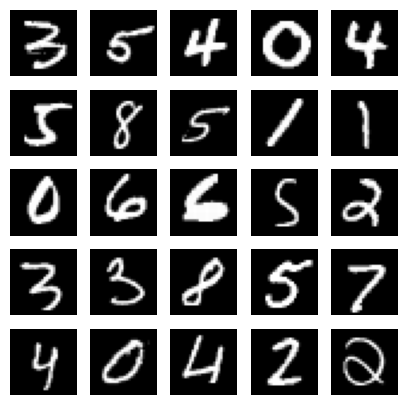

In [4]:
#Sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


#Plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

compute the number of labels

In [14]:
num_labels = len(np.unique(y_train))
# print(num_labels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train[0])
print(y_train[45])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
5
9


 convert to one-hot vector

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])
print(y_train[45])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


input image dimensions

In [21]:
image_size = x_train.shape[1]
print(x_train.shape)
print(image_size)
input_size = image_size * image_size
print(input_size)

(60000, 28, 28)
28
784


*Resize* and normalize

In [23]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


network parameters image is processed as is (square grayscale)

In [27]:
input_shape = (image_size, image_size, 1)
batch_size = 128
hidden_units = 256
dropout = 0.45
print(input_shape)


(28, 28, 1)


#Building Model

In [28]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_units/2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               


1.   loss function for one-hot vector
2.   use of adam optimizer
3.   accuracy is good metric for classification tasks








In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Training of model

In [30]:
#Defining the early stopping criteria
my_callback = [keras.callbacks.EarlyStopping('loss', patience=2)]

In [31]:
history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)
_, acc = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
375/375 [==============================] - 5s 4ms/step - loss: 1.3941 - accuracy: 0.5480 - val_loss: 0.6861 - val_accuracy: 0.8039
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6819 - accuracy: 0.7836 - val_loss: 0.4478 - val_accuracy: 0.8748
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5208 - accuracy: 0.8444 - val_loss: 0.3630 - val_accuracy: 0.8979
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4481 - accuracy: 0.8685 - val_loss: 0.3127 - val_accuracy: 0.9089
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4011 - accuracy: 0.8819 - val_loss: 0.2783 - val_accuracy: 0.9173
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3649 - accuracy: 0.8933 - val_loss: 0.2570 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3388 - accuracy: 0.9007 - val_loss: 0.2348 - val_accuracy: 0.9300
Epoch 

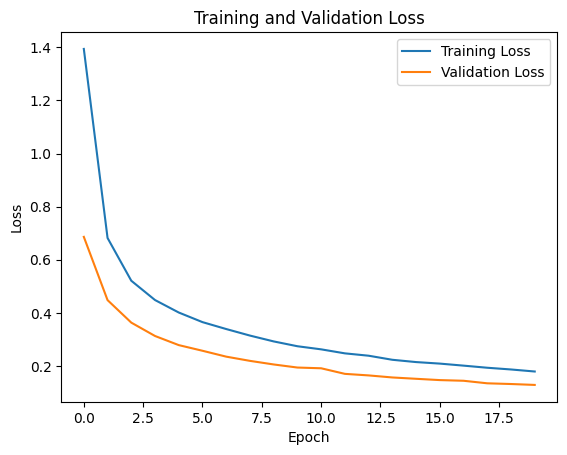

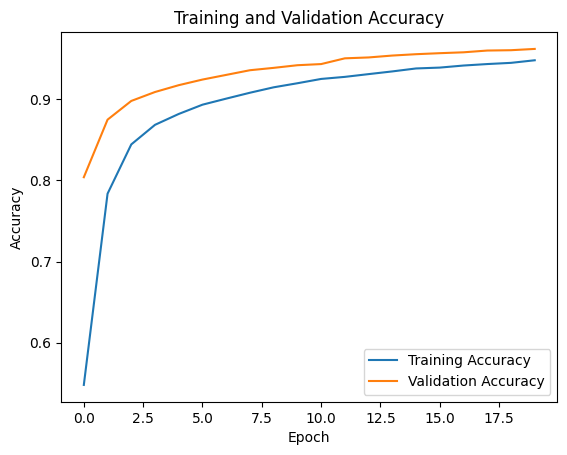

In [32]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#prediction


1/1 [==============================] - 0s 109ms/step


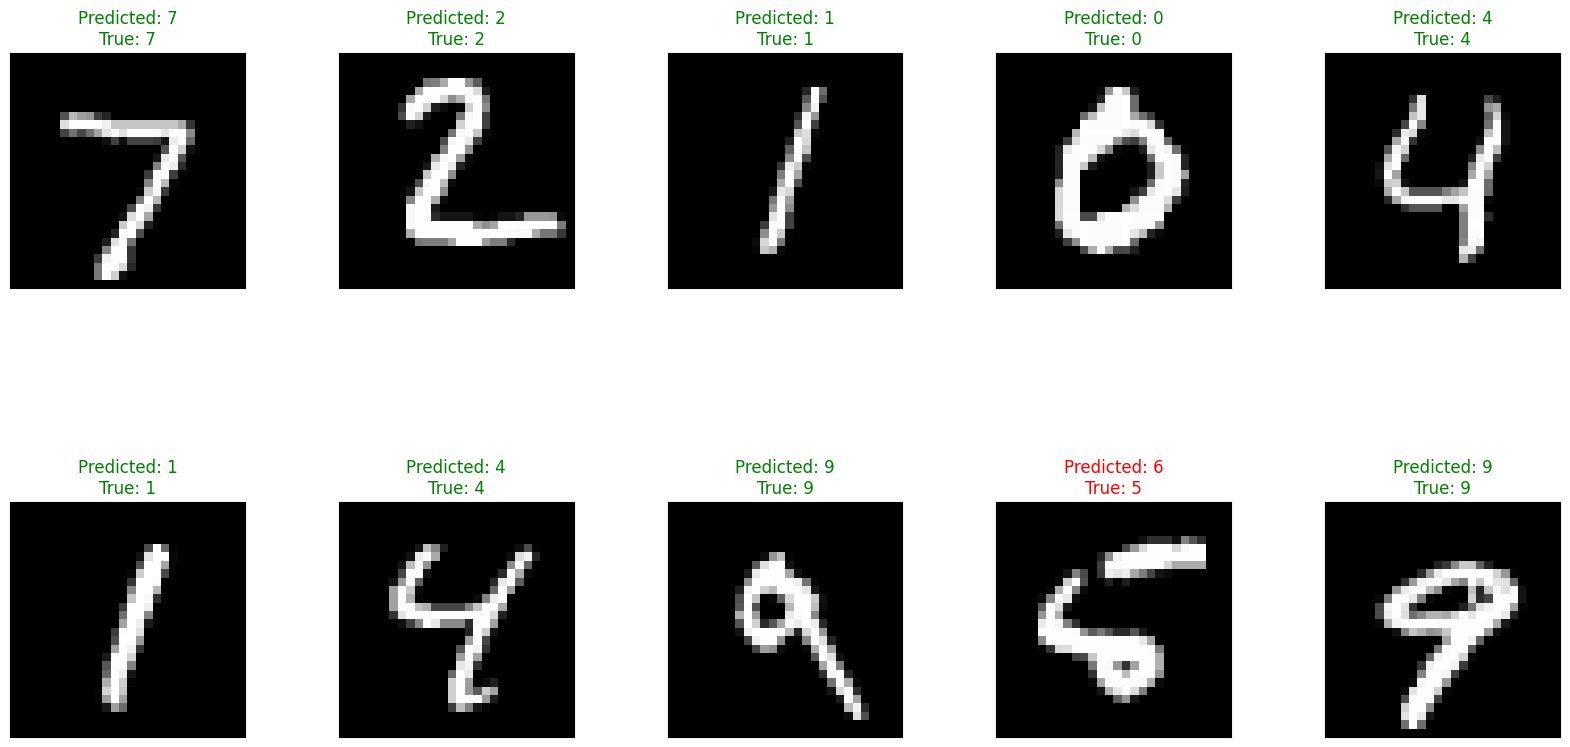

In [33]:
# Make predictions on a sample of test data
predictions = model.predict(x_test[: 10])
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(y_test[:10], axis=1)

# Plot the test samples and their predicted and true labels
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

x_test = x_test.reshape(-1,28,28)

for i, ax in enumerate(axs.flat):
    # Plot the image
    ax.imshow(x_test[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

    # Convert one-hot encoded labels to digit labels
    pred_label = predicted_labels[i].numpy()
    true_label = true_labels[i].numpy()

    # Write the predicted and true labels over the image
    if pred_label == true_label:
        ax.set_title("Predicted: {}\nTrue: {}".format(pred_label, true_label),
                     color='green')
    else:
        ax.set_title("Predicted: {}\nTrue: {}".format(pred_label, true_label),
                     color='red')

plt.show()
